In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('calendar.csv')

In [2]:
# Convert 'date' to datetime format and 'price' to numeric format
df['date'] = pd.to_datetime(df['date'])

df['price'] = df['price'].replace('', 'NaN').apply(lambda x: float(x.strip('$').replace(',', '')) if pd.notnull(x) else pd.NA)


In [3]:
# Extract month and year from date
df['month_year'] = df['date'].dt.to_period('M')
df.head()

,listing_id,date,available,price,month_year
0,241032,2016-01-04,t,85.0,2016-01
1,241032,2016-01-05,t,85.0,2016-01
2,241032,2016-01-06,f,<NA>,2016-01
3,241032,2016-01-07,f,<NA>,2016-01
4,241032,2016-01-08,f,<NA>,2016-01


In [5]:
# Aggregate the number of available airbnb per month
availability = df[df['available'] == 't'].groupby('month_year').size()
availability = availability.reindex(pd.period_range(start=df['month_year'].min(), end=df['month_year'].max(), freq='M'), fill_value=0)


In [6]:
# Drop the last row
availability = availability.drop(availability.index[-1])

availability

2016-01    59239
2016-02    73321
2016-03    83938
2016-04    76037
2016-05    79971
2016-06    77244
2016-07    74222
2016-08    76347
2016-09    77246
2016-10    82438
2016-11    81780
2016-12    87061
Freq: M, dtype: int64

In [7]:
# Calculate average price per month
average_price = df.groupby('month_year')['price'].mean()
average_price = average_price.drop(average_price.index[-1])


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '2016-01'),
  Text(1, 0, '2016-02'),
  Text(2, 0, '2016-03'),
  Text(3, 0, '2016-04'),
  Text(4, 0, '2016-05'),
  Text(5, 0, '2016-06'),
  Text(6, 0, '2016-07'),
  Text(7, 0, '2016-08'),
  Text(8, 0, '2016-09'),
  Text(9, 0, '2016-10'),
  Text(10, 0, '2016-11'),
  Text(11, 0, '2016-12')])

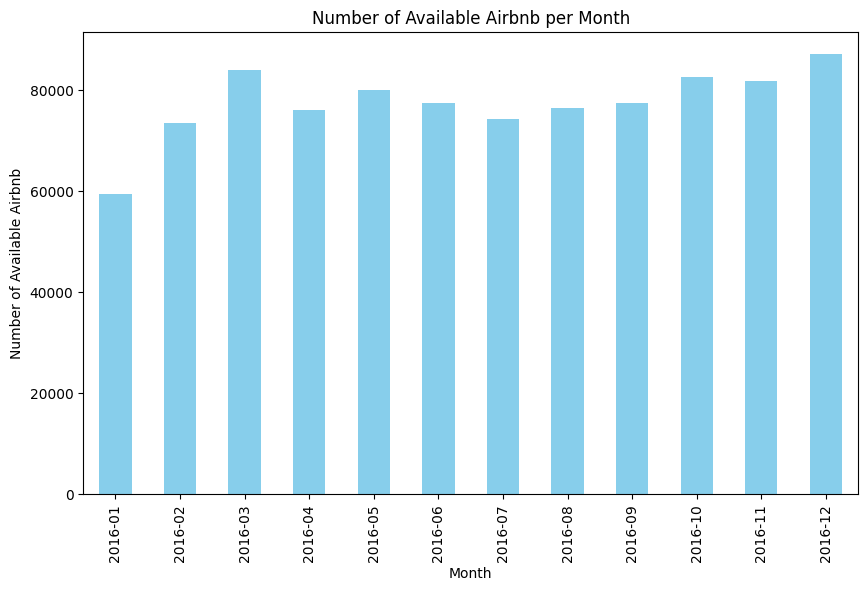

In [8]:
# Plot the number of available airbnb per month
plt.figure(figsize=(10, 6))

availability.plot(kind='bar', color='skyblue')
plt.title('Number of Available Airbnb per Month')
plt.xlabel('Month')
plt.ylabel('Number of Available Airbnb')
plt.xticks(rotation=90)

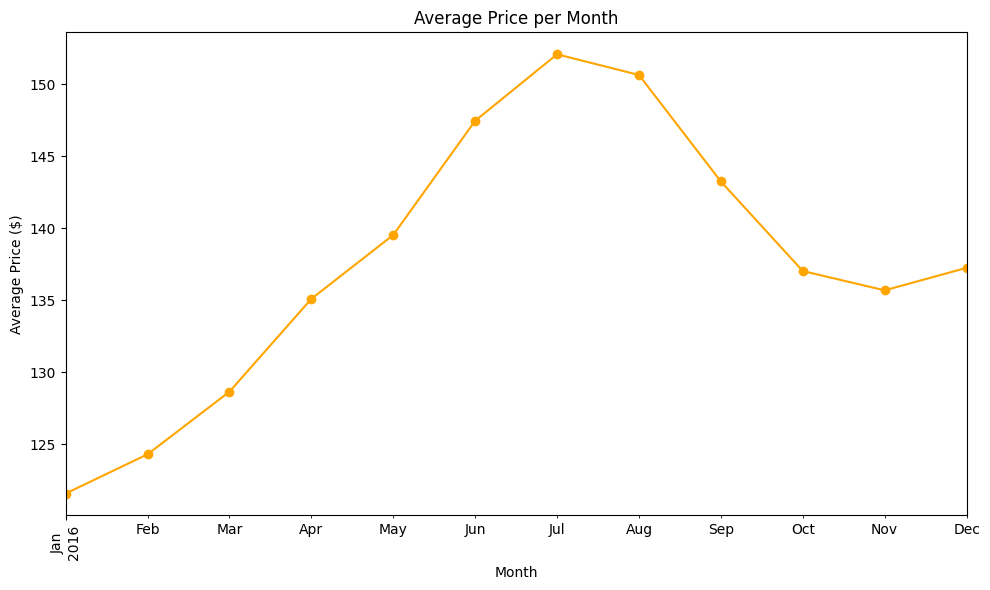

In [9]:
# Plot the average price per month
plt.figure(figsize=(10, 6))
average_price.plot(kind='line', marker='o', color='orange')
plt.title('Average Price per Month')
plt.xlabel('Month')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Thank You!!